In [75]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from progressbar import progressbar

sns.set()

# Linear Regression 

$$\hat{y}=X(X^TX)^{-1}X^Ty$$
$$P\equiv X(X^TX)^{-1}X^T,\;\;P^2=P $$

$P$ therefore represents a probability transition matrix which has the property that
$$\sum_jP_{ij}=1$$

We approximate $$\begin{aligned}y=&E(y|X=x)+\epsilon\\
=&\beta_0+\sum_j X_{j}\beta_j+\epsilon\end{aligned}$$

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

Fake data

In [77]:
L=1000
n1=np.random.multivariate_normal([0,0],[[1,0],[0,1]],L)
n2=np.random.multivariate_normal([5,5],[[1,0],[0,1]],L)
n3=np.random.multivariate_normal([0,10],[[1,0],[0,1]],L)

n1=np.concatenate([n1,np.zeros((L,1),int)],axis=1)
n2=np.concatenate([n2,np.ones((L,1),int)],axis=1)
n3=np.concatenate([n3,2*np.ones((L,1),int)],axis=1)

n=np.concatenate([n1,n2,n3])

In [27]:
L=1000
n1=np.random.multivariate_normal([0,0],[[1,0],[0,1]],L)
n2=np.random.multivariate_normal([5,5],[[1,0],[0,1]],L)

n1=np.concatenate([n1,np.zeros((L,1),int)],axis=1)
n2=np.concatenate([n2,np.ones((L,1),int)],axis=1)

n2classes=np.concatenate([n1,n2])

In [28]:
data2classes=pd.DataFrame(n2classes, columns=['x','y','target'])

In [78]:
data=pd.DataFrame(n, columns=['x','y','target'])

In [79]:
data=data.astype({'target':'int32'})

In [29]:
data2classes=data2classes.astype({'target':'int32'})

Regession

In [30]:
lr=LinearRegression()

In [54]:
enc=OneHotEncoder()
Y=enc.fit_transform(data['target'].values.reshape(-1,1))

In [31]:
enc=OneHotEncoder()
Y=enc.fit_transform(data2classes['target'].values.reshape(-1,1))

In [55]:
lr.fit(data[['x','y']],Y.toarray())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lr.score(data[['x','y']],Y.toarray())

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.4854652134572811

In [34]:
enc.categories_

[array([0, 1], dtype=int32)]

In [35]:
lr.coef_

array([[-0.09444487, -0.09146771],
       [ 0.09444487,  0.09146771]])

In [36]:
lr.intercept_

array([0.96989835, 0.03010165])

In [80]:
class decision:
    def __init__(self,model):
        
        self.model=model
    
    def bnd(self,x,cl1,cl2):
        a=-(self.model.coef_[cl1]-self.model.coef_[cl2])[0]/(self.model.coef_[cl1]-self.model.coef_[cl2])[1]
        b=-(self.model.intercept_[cl1]-self.model.intercept_[cl2])/(self.model.coef_[cl1]-self.model.coef_[cl2])[1]
        
        return a*x+b

In [57]:
lr_bnd=decision(lr)

In [58]:
p1=[0,12]
p2=[lr_bnd.bnd(0,0,1),lr_bnd.bnd(12,0,1)]

p3=[0,12]
p4=[lr_bnd.bnd(0,1,2),lr_bnd.bnd(12,1,2)]

p5=[0,12]
p6=[lr_bnd.bnd(0,0,2),lr_bnd.bnd(12,0,2)]

In [45]:
z1=[-3,8]
z2=[lr_bnd.bnd(z1[0],0,1),lr_bnd.bnd(z1[1],0,1)]

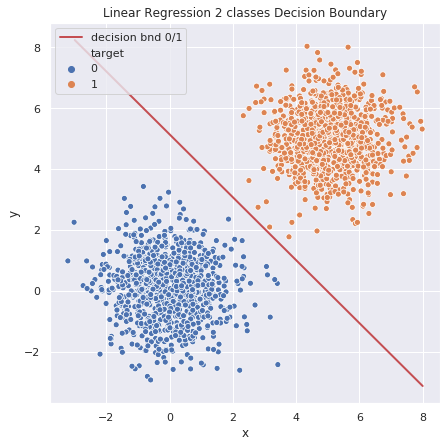

In [50]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data2classes,x='x',y='y',hue='target')
plt.plot(z1,z2,linewidth=2,label='decision bnd 0/1',color='r')
plt.legend(loc='best')
plt.title('Linear Regression 2 classes Decision Boundary')
plt.savefig('lr_2classes.png')
plt.show()

In [19]:
sns.set()

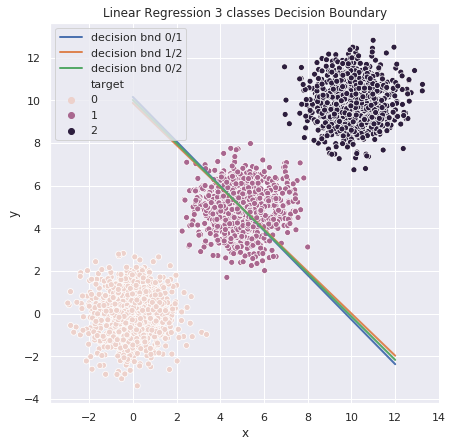

In [61]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x='x',y='y',hue='target')
plt.plot(p1,p2,linewidth=2,label='decision bnd 0/1')
plt.plot(p3,p4,linewidth=2,label='decision bnd 1/2')
plt.plot(p5,p6,linewidth=2,label='decision bnd 0/2')
plt.legend(loc='best')
plt.title('Linear Regression 3 classes Decision Boundary')
plt.savefig('lr_3classes.png')
plt.show()

# Logistic Regression

Apply logistic regression instead

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
Lgr=LogisticRegression()

In [83]:
Lgr.fit(data[['x','y']],data.target)

LogisticRegression()

In [84]:
Lgr.score(data[['x','y']],data.target)

1.0

In [85]:
Lgr.coef_

array([[-0.67197875, -2.13674198],
       [ 1.72089184,  0.13046136],
       [-1.04891309,  2.00628062]])

In [86]:
logit_bnd=decision(Lgr)

In [108]:
x1=-4
x2=8
p1=[x1,x2]
p2=[logit_bnd.bnd(x1,0,1),logit_bnd.bnd(x2,0,1)]

p3=[-4,6]
p4=[logit_bnd.bnd(-4,1,2),logit_bnd.bnd(6,1,2)]

p5=[x1,x2]
p6=[logit_bnd.bnd(x1,0,2),logit_bnd.bnd(x2,0,2)]

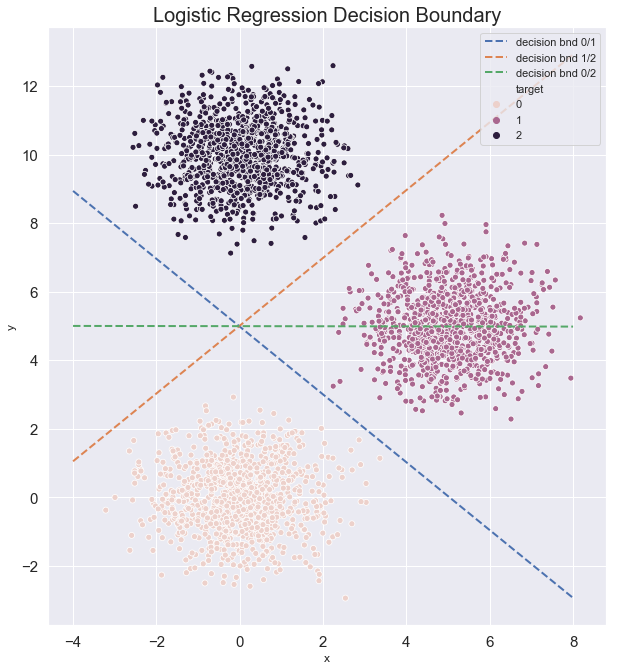

In [137]:
plt.figure(figsize=(10,11))
sns.scatterplot(data=data,x='x',y='y',hue='target')
plt.plot(p1,p2,linewidth=2,label='decision bnd 0/1',linestyle='--')
plt.plot(p3,p4,linewidth=2,label='decision bnd 1/2',linestyle='--')
plt.plot(p5,p6,linewidth=2,label='decision bnd 0/2',linestyle='--')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best')
plt.title('Logistic Regression Decision Boundary',fontsize=20)
plt.savefig('../joaomvg.github.io/content/images/logistic_decision.png')
plt.show()

### Decision boundary

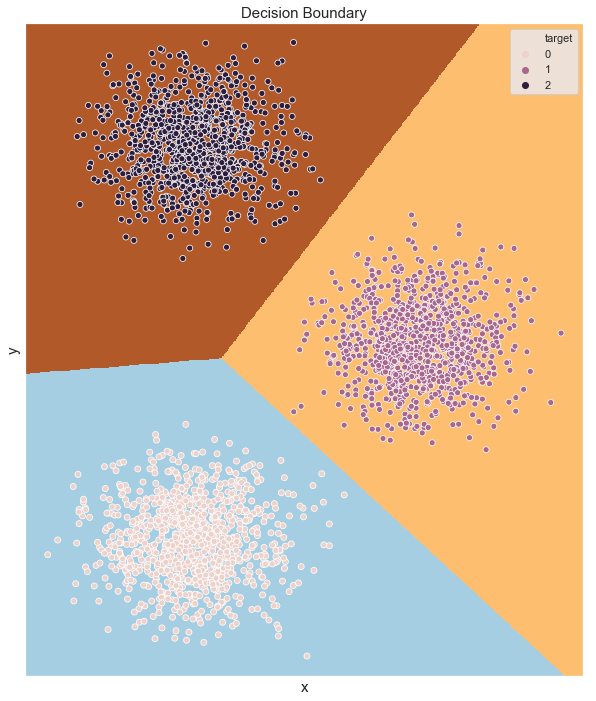

In [138]:
x_min, x_max = data.x.min() - .5, data.x.max() + .5
y_min, y_max = data.y.min() - .5, data.y.max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Lgr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 12))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
sns.scatterplot(data=data,x='x',y='y',hue='target')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.title('Decision Boundary',fontsize=15)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.savefig('../joaomvg.github.io/content/images/logistic_decision_bnd.png')
plt.show()

## Iris Dataset

In [33]:
data_iris=load_iris()

In [34]:
data_iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
data_iris['data'].shape

(150, 4)

In [36]:
LR=LogisticRegression()

In [37]:
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
LR.max_iter=1000

In [39]:
x_train,x_test,y_train,y_test=train_test_split(data_iris['data'],data_iris['target'],test_size=0.2)

In [40]:
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
accuracy_score(LR.predict(x_test),y_test)

0.9333333333333333

In [42]:
accuracy_score(LR.predict(x_train),y_train)

0.975

In [43]:
predictions=np.concatenate((data_iris['data'],LR.predict(data_iris['data']).reshape(150,1)),axis=1)

In [44]:
df_predictions=pd.DataFrame(predictions,columns=['ft1','ft2','ft3','ft4','target'])

In [45]:
df=pd.DataFrame(np.concatenate((data_iris['data'],data_iris['target'].reshape(150,1)),axis=1),columns=['ft1','ft2','ft3','ft4','target'])

In [46]:
df_predictions

,ft1,ft2,ft3,ft4,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [47]:
set(df['target'])

{0.0, 1.0, 2.0}

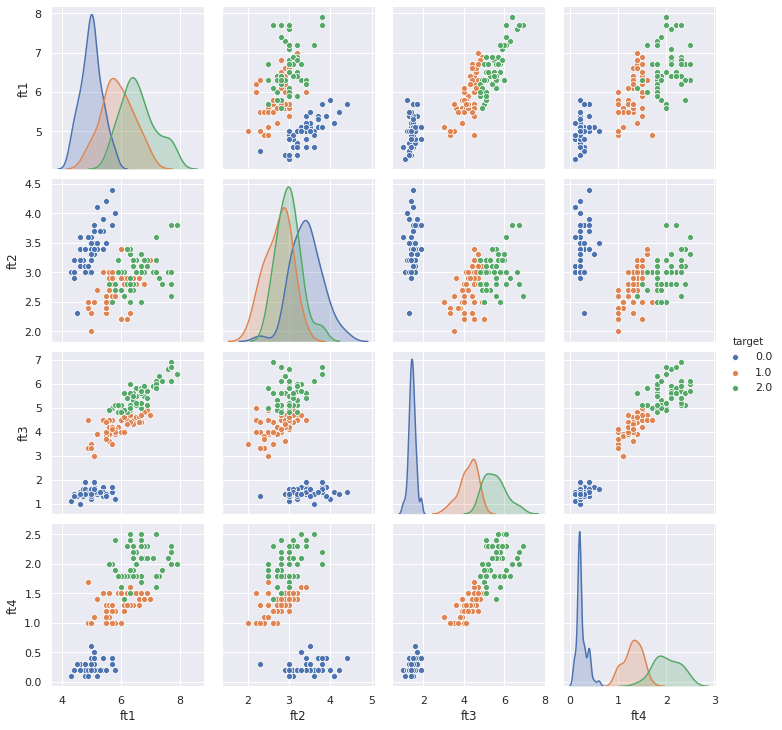

In [48]:
sns.pairplot(data=df_predictions,hue='target')

### Programme it from scratch

$$P(y_k=k|x)=\frac{e^{-w_i^kx^i}}{\sum_ke^{-w_i^kx^i}}$$

$$f_{\mu\nu}\equiv\frac{\partial L}{\partial \omega^{\mu}_{\nu}}=\frac{1}{N}\sum_{(x,y)}\delta^{k(y)}_{\mu}x^{\nu}-\frac{1}{N}\sum_{(x,y)}x^{\nu}P_{\mu}(x)$$

$$\frac{\partial^2 L}{\partial \omega^{\mu}_{\nu}\partial \omega^{\alpha}_{\beta}}=\frac{1}{N}\sum_{(x,y)}x^{\nu}x^{\beta}\delta_{\mu\alpha}P_{\mu}-x^{\nu}x^{\beta}P_{\mu}P_{\alpha}$$

where $x^{\mu}_0=1$ and $\omega^0_{\nu}=0$

In [30]:
class Logit:
    def __init__(self,n_features,n_classes):
        self.n_features=n_features
        self.n_classes=n_classes
        self.weight=np.random.normal(0,0.1,(n_classes,n_features))
        self.weight[0]=0
        
    def __call__(self,x):
        
        wx=-np.dot(x,self.weight.T)
        wx=np.exp(wx)
        Z=wx.sum(1).reshape(-1,1)
        return wx/Z

In [31]:
class logloss:
    def __init__(self,model):
        
        self.prob=model
        self.delta_w=None
        self.nf=model.n_features
        self.nc=model.n_classes
        
    def backward(self,x,y):
        p=self.prob(x)
        z=np.tensordot(x,y[:,1:]-p[:,1:],axes=[0,0])
        z=z.reshape(-1,1)
        z=z/x.shape[0]
        
        return z
    
    def back_square(self,x):
        p=self.prob(x)
        p=p[:,1:]
        
        z=0
        for a,b in zip(x,p):
            idt=np.diag(b)
            k=np.outer(a,a)
            w=np.outer(b,b)
            z+=np.tensordot(k,idt-w,axes=0)
        z=np.transpose(z,(0,2,1,3))
        z=z.reshape(z.shape[0],z.shape[1],z.shape[2]*z.shape[3])
        z=z.reshape(z.shape[0]*z.shape[1],-1)
        z=z/x.shape[0]
        
        return z
    
    def step(self):
        
        self.prob.weight[1:,:]+=self.delta_w
        
    def delta(self,x,y):
        
        f=self.backward(x,y)
        M=self.back_square(x)
        M_inv=np.linalg.inv(M)
        delta_w=-np.dot(M_inv,f)
        delta_w=delta_w.reshape(self.nf,-1)
        delta_w=delta_w.T
        return delta_w
        
    def __call__(self,x,y):
        #y is hot encoded
        p=self.prob(x)
        p=p*y
        p=p.sum(1)
        self.delta_w=self.delta(x,y)
        
        return -np.log(p).mean()

### Newton-Raphson method

In [32]:
def training(model,x,y,num_iter=10):
    loss=logloss(model)
    for i in range(num_iter):
        L=loss(x,y)
        loss.step()
        print("Loss=",L," iter:",i)

In [49]:
y=enc.fit_transform(y_train.reshape(-1,1))

In [50]:
model=Logit(5,3)

In [51]:
X=np.concatenate([x_train,np.ones((x_train.shape[0],1))],axis=1)

In [52]:
training(model,X,y.toarray(),10)

Loss= 1.132071550893284  iter: 0
Loss= 0.39527765887814137  iter: 1
Loss= 0.23293349410262507  iter: 2
Loss= 0.1204119238092625  iter: 3
Loss= 0.0764595509536848  iter: 4
Loss= 0.05825789321079276  iter: 5
Loss= 0.050498087896463074  iter: 6
Loss= 0.047348357827005604  iter: 7
Loss= 0.04640902616388638  iter: 8
Loss= 0.046230548161667495  iter: 9


In [53]:
(model(X).argmax(1)==y_train).sum()/x_train.shape[0]

0.9833333333333333

In [2]:
def sigma(x):
    
    return 1/(1+np.exp(-x))

In [17]:
def predictor(x):
    if x>=0.5:
        return 1
    else:
        return 0

In [8]:
y=sigma(np.arange(-5,5,0.01))

In [15]:
choice=np.random.choice(np.arange(-5,5,0.01),20,replace=False)

In [23]:
(choice>=0.5).astype('int')

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

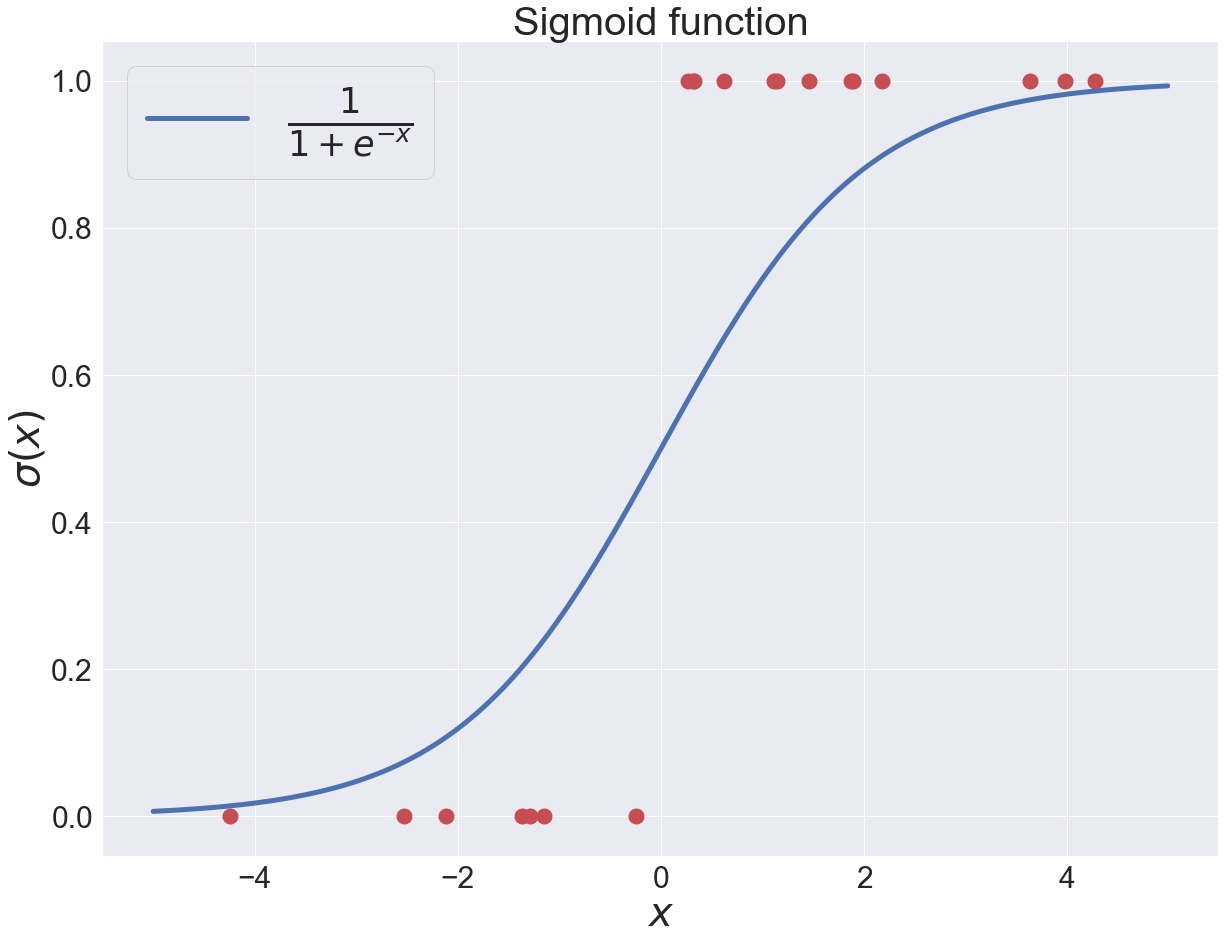

In [74]:
plt.figure(figsize=(20,15))
plt.plot(np.arange(-5,5,0.01),y,label=r'$\frac{1}{1+e^{-x}}$',linewidth=5)
plt.legend(fontsize=50)
plt.scatter(choice,(sigma(choice)>=0.5).astype('int'),color='r',linewidth=10)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel(r'$x$',fontsize=40)
plt.ylabel(r'$\sigma(x)$',fontsize=40)
plt.title("Sigmoid function",fontsize=40)
plt.savefig('../joaomvg.github.io/content/images/sigmoid.png',dpi=150)
plt.show()

# Linear Discriminant Analysis

$$P(x|y=k)=\frac{1}{\sqrt{2\pi\text{det}\Sigma}}e^{-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)}$$

$$P(y=k|x)=\frac{e^{-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)}P(k)}{\sum_le^{-\frac{1}{2}(x-\mu_l)^T\Sigma^{-1}(x-\mu_l)}P(l)}$$

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [111]:
lda=LinearDiscriminantAnalysis(solver='lsqr')

In [56]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)

from scratch

In [112]:
class LDAmodel:
    
    def __init__(self,sigma=None,mu=None,prior_prob=None):
        self.sigma=sigma
        self.mu=mu
        self.prior_prob=prior_prob
        if sigma is None:
            self.inv=None
            self.det=None
        else:
            self.inv=np.linalg.inv(sigma)
            self.det=np.linalg.det(sigma)
        if mu==None:
            self.nc=None
            self.dim=None
        else:
            self.nc=mu.shape[0]
            self.dim=mu.shape[1]
        
        self.coef_=None
        self.intercept_=None
        
    def means(self,x,y):
        yset=set(y)
        means=np.zeros((len(yset),x.shape[1]))
        for i in yset:
            means[i]=x[y==i].mean(0)
        return means
    
    def var(self,x,y):
        yset=set(y)
        d=x.shape[1]
        var=np.zeros((d,d))
        means=self.means(x,y)
        for i in yset:
            c=x[y==i]-means[i]
            var+=np.tensordot(c,c,axes=[0,0])
        var=var/x.shape[0]
        
        return var
    
    def priors(self,x,y):
        priors=np.zeros(3)
        yset=set(y)
        for i in yset:
            priors[i]=(y==i).sum()/y.shape[0]
        
        return priors
    
    def fit(self,x,y):
        self.mu=self.means(x,y)
        self.sigma=self.var(x,y)
        self.prior_prob=self.priors(x,y)
        self.inv=np.linalg.inv(self.sigma)
        self.det=np.linalg.det(self.sigma)
        self.nc=len(set(y))
        self.dim=x.shape[1]
        
        self.coef_=np.dot(self.mu,self.inv)
        self.intercept_=np.zeros(self.nc)
        for i in range(self.nc):
            v=np.dot(self.inv,self.mu[i])
            self.intercept_[i]=-0.5*np.dot(self.mu[i],v)
        
    def __call__(self,x):
        probs=np.zeros((x.shape[0],self.nc))
        for i in range(self.nc):
            t=x-self.mu[i]
            w=np.dot(t,self.inv)
            w=(t*w).sum(1)
            probs[:,i]=np.exp(-0.5*w)*self.priors[i]
            probs[:,i]=probs[:,i]/((2*np.pi)**(self.dim/2)*np.sqrt(np.abs(self.det)))
        Z=probs.sum(1)
        return probs/Z.reshape(-1,1)

In [113]:
ldam=LDAmodel()

In [114]:
ldam.fit(data[['x','y']].values,data['target'].values)

In [115]:
lda_bnd=decision(ldam)

In [120]:
p1=[-4,8]
p2=[lda_bnd.bnd(-4,0,1),lda_bnd.bnd(8,0,1)]

p3=[-4,8]
p4=[lda_bnd.bnd(-4,1,2),lda_bnd.bnd(8,1,2)]

p5=[-4,8]
p6=[lda_bnd.bnd(-4,0,2),lda_bnd.bnd(8,0,2)]

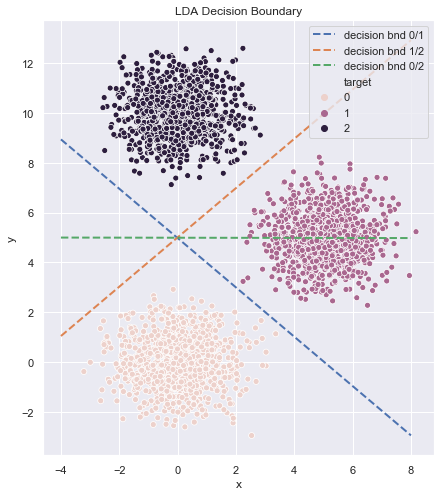

In [123]:
plt.figure(figsize=(7,8))
sns.scatterplot(data=data,x='x',y='y',hue='target')
plt.plot(p1,p2,linewidth=2,label='decision bnd 0/1',linestyle='--')
plt.plot(p3,p4,linewidth=2,label='decision bnd 1/2',linestyle='--')
plt.plot(p5,p6,linewidth=2,label='decision bnd 0/2',linestyle='--')
plt.legend(loc='best')
plt.title('LDA Decision Boundary')
plt.show()

# Hyperplanes and Support Vector Machines

In [9]:
from sklearn.svm import SVC

In [10]:
svc=SVC(kernel='linear',C=10000,decision_function_shape='ovo')

In [11]:
svc.fit(data[['x','y']],data['target'])

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
svc.score(data[['x','y']],data['target'])

1.0

In [13]:
svc.coef_

array([[-2.32197558, -2.76373325],
       [-0.18097064, -0.19777509],
       [-1.03226284, -1.12794795]])

In [14]:
svc.intercept_

array([14.55480267,  2.01165896, 16.17873079])

In [15]:
svc.support_vectors_

array([[2.77537494, 2.5728656 ],
       [2.75475159, 3.31370797],
       [7.13103264, 6.93075173],
       [3.34228094, 2.8200912 ],
       [8.65306709, 7.31124691],
       [6.59605871, 9.19347556]])

In [16]:
svc_bnd=decision(svc)

NameError: name 'decision' is not defined

In [1440]:
p1=[0,12]
p2=[svc_bnd.bnd(0,0,1),svc_bnd.bnd(12,0,1)]

p3=[0,12]
p4=[svc_bnd.bnd(0,1,2),svc_bnd.bnd(12,1,2)]

p5=[0,12]
p6=[svc_bnd.bnd(0,0,2),svc_bnd.bnd(12,0,2)]

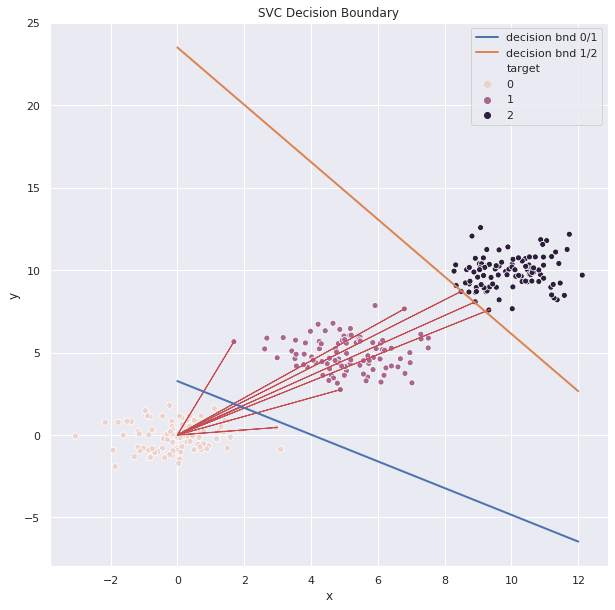

In [1441]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='x',y='y',hue='target')
plt.plot(p1,p2,linewidth=2,label='decision bnd 0/1')
plt.plot(p3,p4,linewidth=2,label='decision bnd 1/2')
#plt.plot(p5,p6,linewidth=2,label='decision bnd 0/2')
for v in svc.support_vectors_:
    plt.arrow(0,0,v[0],v[1],label='support vec 1',color='r',head_width=0.04)
plt.legend(loc='best')
plt.title('SVC Decision Boundary')
plt.show()

from scratch
$$\text{min}_{w,b} |w|^2 +\frac{1}{m}\sum_i \text{max}(0,1-y_i(x_i^Tw+b))$$

$$L_D=\sum_i \alpha_i -\frac{1}{2}\sum_{i,j}\alpha_i\alpha_jy_iy_jx_i^{T}x_j$$

In [16]:
import random
import cvxopt

In [24]:
class SVCmodel:
    def __init__(self,num_iter=10**5,lr=0.001,kernel='linear'):
        self.kernel=kernel
        print("Using kernel: ",kernel)
        self.coef_=None
        self.intercept_={}
        self.weight_={}
        self.support_vectors_={}
        self.classes=None
        self.num_iter=num_iter
        self.lr=lr
    
    
    def fit(self,x,y):
        cvxopt.solvers.options['show_progress'] = False
        y_aux=y.copy().reshape(-1,1)
        y_aux=y_aux.astype('float64')
        self.classes=set(y)
        pairs=[]
        for i in self.classes:
            for j in self.classes:
                if j>i:
                    pairs.append((i,j))
        
        for pair in pairs:
            i,j=pair
            idx=(y_aux==i) | (y_aux==j)
            idx=idx.reshape(-1,)
            x_temp=x[idx].copy()
            y_temp=y_aux[idx].copy()
            y_temp[y_temp==j]=-1.0
            y_temp[y_temp==i]=1.0
            
            z=y_temp*x_temp
            Q=0.5*np.tensordot(z,z,axes=[(1),(1)])
            print(Q.shape)
            Q=cvxopt.matrix(Q.tolist())
            p=-1*np.ones(x_temp.shape[0])
            p=cvxopt.matrix(p.tolist())
            G=-1*np.identity(x_temp.shape[0])
            G=cvxopt.matrix(G.tolist())
            h=np.zeros(x_temp.shape[0])
            h=cvxopt.matrix(h.tolist())
            A=cvxopt.matrix(y_temp.tolist())
            b=cvxopt.matrix(0.0)

            sol=cvxopt.solvers.qp(Q, p, G, h, A, b)
            sol=np.array(sol['x'])
            sup_vec_loc=np.round(sol,2).reshape(-1,)
            sol[sup_vec_loc==0]=0
            sup_vec_loc=sup_vec_loc!=0
            sup_vec=x_temp[sup_vec_loc]
            self.support_vectors_[pair]=sup_vec
            w=((sol*y_temp)*x_temp).sum(0)
            y_s=y_temp[sup_vec_loc]
            v=np.dot(sup_vec,w.reshape(-1,1))
            coef=(y_s*v).mean()-y_s.mean()*v.mean()
            coef=coef/(v.var())
            intercept=y_s.mean()-coef*v.mean()
            self.intercept_[pair]=intercept
            self.weight_[pair]=coef*w
            
        print('Done')
        
    def set_kernel(self,kernel):
        self.kernel=kernel

In [25]:
sv=SVCmodel()

Using kernel:  linear


In [26]:
sv.fit(data[['x','y']].values,data['target'].values)

(2000, 2000)
(2000, 2000)
(2000, 2000)
Done


In [20]:
sv.weight_

{(0, 1): array([-2.32242916, -2.7642807 ]),
 (0, 2): array([-0.18089611, -0.19769375]),
 (1, 2): array([-1.03206545, -1.12790084])}

In [21]:
svc.coef_

array([[-2.32197558, -2.76373325],
       [-0.18097064, -0.19777509],
       [-1.03226284, -1.12794795]])

In [22]:
sv.intercept_

{(0, 1): 14.557734397988062,
 (0, 2): 2.010693965042738,
 (1, 2): 16.176893045391164}

In [23]:
svc.intercept_

array([14.55480267,  2.01165896, 16.17873079])

## SMO algorithm

In [ ]:
y=data['target'].values.copy()
y=y.reshape(-1,1)
x=data[['x','y']].values.copy()
idx=(y==0)|(y==1)
idx=idx.reshape(-1,)
x=x[idx]
y=y[idx]
y[y!=0]=-1.0
y[y==0]=1.0

alpha=np.random.normal(0,10,(y.shape[0],1))
alpha=np.abs(alpha)

l=[i for i in range(x.shape[0])]
samples=[(i,j) for i in l for j in l if i<j]
random.shuffle(samples)

num_iter=0
threshold=len(samples)
not_converged=True
alpha_prev=alpha.copy()
T=(alpha*y).sum()
Z=(alpha*y*x).sum(0)
while not_converged and num_iter<5*threshold:
    
    for i,j in samples:
        
        alpha0=alpha[i][0]
        alpha1=alpha[j][0]
        y0=y[i][0]
        y1=y[j][0]

        k=-T+alpha0*y0+alpha1*y1
        if y1*k<0 and y0*y1>0:
            continue
        A=Z-alpha0*y0*x[i]-alpha1*y1*x[j]
        B=x[i]-x[j]
        a=1-y0*y1-y0*k*np.dot(B,x[j])-y0*np.dot(B,A)
        a=a/(np.dot(B,B))

        alpha0=max(0,a)
        alpha1=y1*k-alpha0*y0*y1
        if alpha1<0:
            alpha1=0
            alpha0=k*y0

        alpha[i][0]=alpha0
        alpha[j][0]=alpha1
        
        T=-k+alpha0*y0+alpha1*y1
        Z=A+alpha0*y0*x[i]+alpha1*y1*x[j]
        
        error=alpha-alpha_prev    
        error=np.abs(error).max()
        if error<10**(-8) and num_iter>3*threshold:
            not_converged=False
            print('converged')
            break
        alpha_prev=alpha.copy()
        num_iter+=1

In [147]:
num_iter

59701

In [148]:
sup_vec=(alpha>0).reshape(-1,)

In [149]:
x[sup_vec]

array([[3.00732829, 0.19387406],
       [4.75777683, 2.04779363],
       [3.65594525, 3.0750571 ]])

In [105]:
svc.support_vectors_

array([[ 3.00732829,  0.19387406],
       [ 0.30017171,  1.92725338],
       [ 4.75777683,  2.04779363],
       [ 7.53689042,  6.69361188],
       [ 3.65594525,  3.0750571 ],
       [10.23254616,  7.65094119],
       [ 8.39157417,  8.77445329]])